<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#引入包" data-toc-modified-id="引入包-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>引入包</a></span></li><li><span><a href="#数据概况分析" data-toc-modified-id="数据概况分析-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据概况分析</a></span></li><li><span><a href="#数据处理" data-toc-modified-id="数据处理-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数据处理</a></span><ul class="toc-item"><li><span><a href="#无关特征删除" data-toc-modified-id="无关特征删除-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>无关特征删除</a></span></li><li><span><a href="#缺失值处理" data-toc-modified-id="缺失值处理-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>缺失值处理</a></span></li><li><span><a href="#数据类型转换" data-toc-modified-id="数据类型转换-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>数据类型转换</a></span></li><li><span><a href="#可视化分析" data-toc-modified-id="可视化分析-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>可视化分析</a></span></li></ul></li></ul></div>

对数据进行探索和分析：
- 数据类型的分析
- 无关特征删除
- 数据类型转换
- 缺失值处理
- ……以及你能想到和借鉴的数据分析处理

### 引入包

In [1]:
#引入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('fivethirtyeight')
%matplotlib inline
warnings.filterwarnings('ignore')

### 数据概况分析

In [2]:
#读入数据
data = pd.read_csv('data.csv', encoding='gbk')
data.head() # 共90列
data.info()  # 数据类型：dtypes: float64(70), int64(13), object(7)
data.describe()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,5.000000,1.140000e+02,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3106.000000,7.593358e+05,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,6006.500000,1.634942e+06,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8999.000000,2.597905e+06,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,11992.000000,4.004694e+06,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


### 数据处理

#### 无关特征删除

In [3]:
#无关特征删除
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.nunique()

Unnamed: 0                                    4754
custid                                        4754
trade_no                                      4754
bank_card_no                                     1
low_volume_percent                              40
middle_volume_percent                           90
take_amount_in_later_12_month_highest          166
trans_amount_increase_rate_lately              782
trans_activity_month                            84
trans_activity_day                             512
transd_mcc                                      41
trans_days_interval_filter                     147
trans_days_interval                            114
regional_mobility                                5
student_feature                                  2
repayment_capability                          2390
is_high_user                                     2
number_of_trans_from_2011                       70
first_transaction_time                        1693
historical_trans_amount        

bank_card_no 和 source列的非重复值只有1个，应删除，前3列是用户的id等，对分析没有价值，也应该删除，删除完这些无关特征后数据的shape应该是(4574,85)

In [4]:
del_cols = ['bank_card_no','source','Unnamed: 0','custid','trade_no']
data.drop(del_cols,axis=1,inplace=True)
data.shape

(4754, 85)

In [5]:
# 查看id_name
data['id_name'].value_counts().head(20)
#data['id_name'].head()

张龙    5
李明    5
李杰    5
陈波    4
李波    4
刘强    4
陈鹏    4
张伟    4
张超    4
王毅    3
李栋    3
杨明    3
张旭    3
李博    3
杨浩    3
张健    3
张杰    3
刘磊    3
王强    3
刘凯    3
Name: id_name, dtype: int64

In [6]:
data.drop(['id_name'], axis=1, inplace=True)
data.shape

(4754, 84)

#### 缺失值处理

In [7]:
# 转换字符型变量
obj_cols = data.columns[data.dtypes == 'object']
data[obj_cols].head()

,reg_preference_for_trad,latest_query_time,loans_latest_time
0,一线城市,2018-04-25,2018-04-19
1,一线城市,2018-05-03,2018-05-05
2,一线城市,2018-05-05,2018-05-01
3,三线城市,2018-05-05,2018-05-03
4,一线城市,2018-04-15,2018-01-07


In [8]:
# 将数据转化为类别数据和数值数据，方便缺失值处理
data_obj = data[obj_cols]
data_num = data.drop(obj_cols, axis=1)

# 分别查看类别数据和数值数据的缺失值
print('类别数据缺失值： ')
data_obj_isnull = data_obj.isnull().sum(axis=0)
data_obj_isnull[data_obj_isnull != 0].sort_values(ascending=False)

print('数值数据缺失值： ')
data_num_isnull = data_num.isnull().sum(axis=0)
data_num_isnull[data_num_isnull != 0].sort_values(ascending=False)

类别数据缺失值： 


latest_query_time          304
loans_latest_time          297
reg_preference_for_trad      2
dtype: int64

数值数据缺失值： 


student_feature                            2998
cross_consume_count_last_1_month            426
query_finance_count                         304
query_cash_count                            304
latest_six_month_apply                      304
latest_three_month_apply                    304
query_sum_count                             304
latest_one_month_apply                      304
latest_query_day                            304
query_org_count                             304
apply_credibility                           304
apply_score                                 304
latest_one_month_loan                       297
loans_score                                 297
loans_credibility_behavior                  297
loans_count                                 297
loans_settle_count                          297
loans_overdue_count                         297
loans_org_count_behavior                    297
consfin_org_count_behavior                  297
loans_cash_count                        

In [9]:
from sklearn.preprocessing import Imputer

# 类别缺失值处理：前值或者后值填充
data_obj.fillna(method='ffill',inplace=True) #'bfill'后向填充

# 数值缺失值处理： 均值/中位数等填充
data_num = pd.DataFrame(Imputer(strategy='mean').fit_transform(data_num), 
                        columns=data_num.columns)

/usr/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


#### 数据类型转换

In [10]:
# 将类别变量one-hot编码
data_obj = pd.get_dummies(data_obj, columns=['reg_preference_for_trad'])
# 将日期字符串转化为pandas日期格式datetime64
data_obj['latest_query_time'] = pd.to_datetime(data_obj['latest_query_time'])
#data['loans_latest_time'] = data['loans_latest_time'].astype('datetime64') ## 报错 
data_obj['loans_latest_time'] = pd.to_datetime(data_obj['loans_latest_time'])

# 日期的weekday、year、month、day
data_obj['latest_query_year'] = data_obj.latest_query_time.dt.year
data_obj['latest_query_month'] = data_obj.latest_query_time.dt.month
data_obj['latest_query_weekday'] = data_obj.latest_query_time.dt.weekday

data_obj['loans_latest_year'] = data_obj.loans_latest_time.dt.year
data_obj['loans_latest_month'] = data_obj.loans_latest_time.dt.month
data_obj['loans_latest_weekday'] = data_obj['loans_latest_time'].apply(lambda x: x.weekday())

In [11]:
data_obj.head()

,latest_query_time,loans_latest_time,reg_preference_for_trad_一线城市,reg_preference_for_trad_三线城市,reg_preference_for_trad_二线城市,reg_preference_for_trad_其他城市,reg_preference_for_trad_境外,latest_query_year,latest_query_month,latest_query_weekday,loans_latest_year,loans_latest_month,loans_latest_weekday
0,2018-04-25,2018-04-19,1,0,0,0,0,2018,4,2,2018,4,3
1,2018-05-03,2018-05-05,1,0,0,0,0,2018,5,3,2018,5,5
2,2018-05-05,2018-05-01,1,0,0,0,0,2018,5,5,2018,5,1
3,2018-05-05,2018-05-03,0,1,0,0,0,2018,5,5,2018,5,3
4,2018-04-15,2018-01-07,1,0,0,0,0,2018,4,6,2018,1,6


In [12]:
data_final = pd.concat([data_obj,data_num], axis=1)
data_final.head()

,latest_query_time,loans_latest_time,reg_preference_for_trad_一线城市,reg_preference_for_trad_三线城市,reg_preference_for_trad_二线城市,reg_preference_for_trad_其他城市,reg_preference_for_trad_境外,latest_query_year,latest_query_month,latest_query_weekday,loans_latest_year,loans_latest_month,loans_latest_weekday,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,status,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,2018-04-25,2018-04-19,1,0,0,0,0,2018,4,2,2018,4,3,0.01,0.99,0.0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,1.001139,19890.0,0.0,30.0,20130817.0,149050.0,151.0,0.40,34030.0,7.0,3920.0,0.15,1020.0,0.55,4.0,19.0,4.0,19.0,1.0,1.0,2.0,2.0,5.0,2170.0,6.0,0.0,1970.0,18040.0,0.0,1.0,1738.0,85.0,583.0,79.0,8.0,2.0,6.0,10.0,2.0,5.0,8.0,552.0,73.0,37.0,34.0,2.0,10.0,1.0,9.0,1.0,1.0,13.0,37.0,7.0,1.0,0.0,341.0,2200.0,72.0,9.0,10.0,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,2018-05-03,2018-05-05,1,0,0,0,0,2018,5,3,2018,5,5,0.02,0.94,2000.0,1.28,1.00,0.458,19.0,30.0,14.0,4.0,1.000000,16970.0,0.0,23.0,20160402.0,302910.0,224.0,0.35,10590.0,5.0,6950.0,0.05,1210.0,0.50,13.0,30.0,13.0,30.0,0.0,0.0,3.0,3.0,330.0,2100.0,9.0,0.0,1820.0,15680.0,0.0,0.0,779.0,84.0,653.0,73.0,7.0,4.0,2.0,8.0,2.0,6.0,8.0,635.0,76.0,37.0,36.0,0.0,17.0,5.0,12.0,2.0,2.0,8.0,49.0,4.0,2.0,1.0,353.0,2000.0,74.0,12.0,12.0,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,2018-05-05,2018-05-01,1,0,0,0,0,2018,5,5,2018,5,1,0.04,0.96,0.0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,1.001139,9710.0,0.0,9.0,20170617.0,11520.0,31.0,1.00,5710.0,5.0,840.0,0.65,570.0,0.65,0.0,68.0,0.0,68.0,0.0,3.0,6.0,6.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,338.0,95.0,654.0,76.0,11.0,5.0,5.0,16.0,5.0,5.0,14.0,633.0,83.0,4.0,2.0,0.0,3.0,1.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,157.0,1500.0,77.0,2.0,2.0,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,2018-05-05,2018-05-03,0,1,0,0,0,2018,5,5,2018,5,3,0.00,0.96,2000.0,0.13,0.57,0.777,22.0,14.0,6.0,3.0,1.001139,6210.0,0.0,33.0,20130516.0,491130.0,360.0,0.15,91690.0,7.0,46850.0,0.05,1290.0,0.45,6.0,8.0,6.0,8.0,0.0,1.0,8.0,8.0,31700.0,8140.0,9.0,0.0,2700.0,27970.0,0.0,0.0,1831.0,82.0,595.0,79.0,12.0,7.0,4.0,22.0,3.0,16.0,17.0,542.0,75.0,85.0,81.0,4.0,22.0,5.0,17.0,2.0,4.0,34.0,91.0,26.0,2.0,0.0,355.0,1800.0,74.0,1

#### 可视化分析

<Figure size 3600x576 with 0 Axes>

Text(0.5,1,'Overdue counts by latest query date')

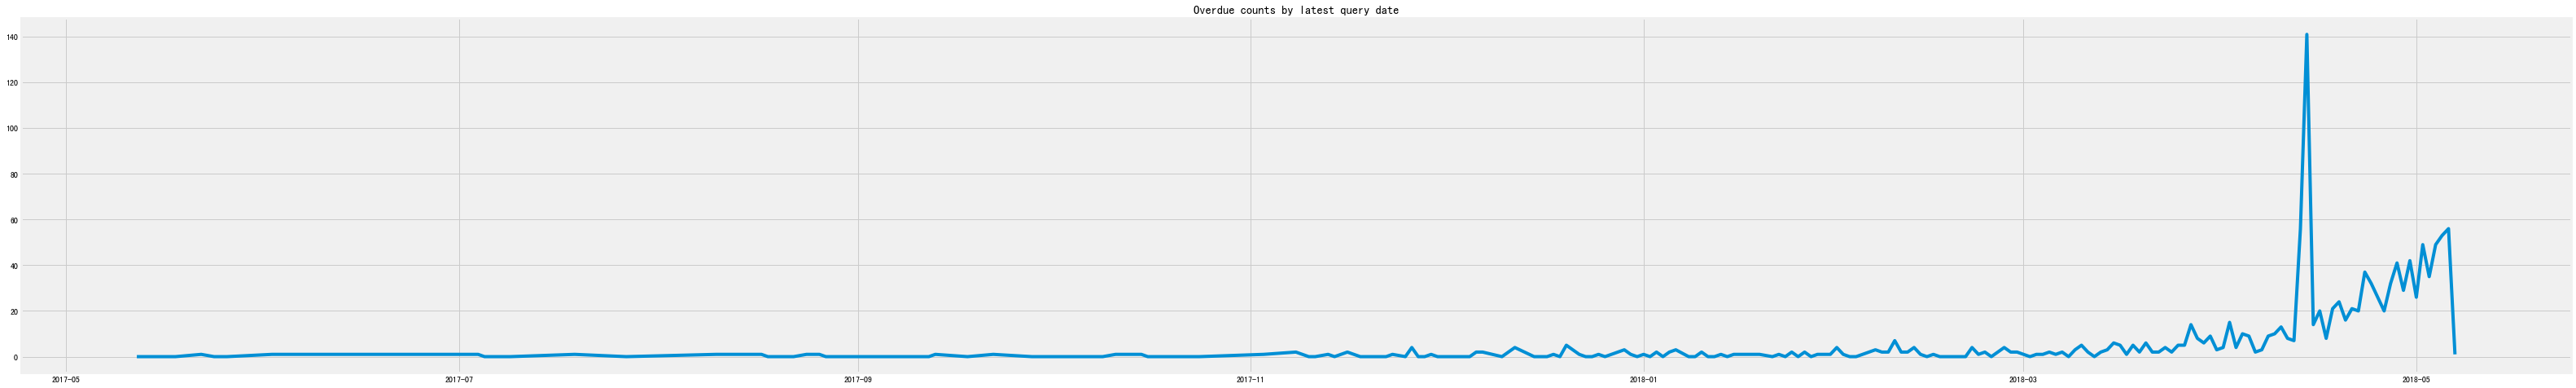

In [13]:
plt.figure(figsize=(50, 8))
querytime_group = data_final.groupby(['latest_query_time'])['status'].sum()
plt.plot(querytime_group)
plt.title('Overdue counts by latest query date')
plt.show()

<Figure size 3600x576 with 0 Axes>

Text(0.5,1,'Overdue counts by latest loans date')

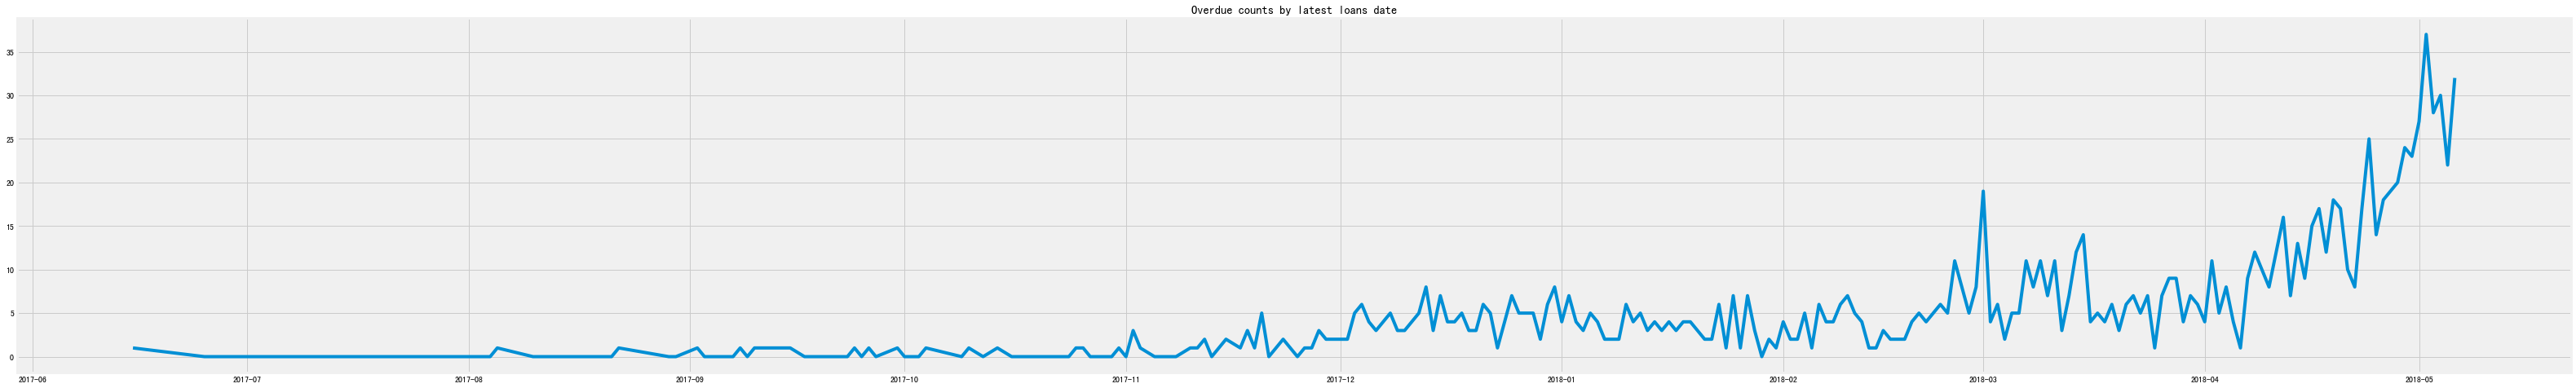

In [14]:
plt.figure(figsize=(50, 8))
loanstime_group = data_final.groupby(['loans_latest_time'])['status'].sum()
plt.plot(loanstime_group)
plt.title('Overdue counts by latest loans date')
plt.show()

In [15]:
data_final['latest_query_weekday'].replace(0, '01 - Monday', inplace=True)
data_final['latest_query_weekday'].replace(1, '02 - Tuesday', inplace=True)
data_final['latest_query_weekday'].replace(2, '03 - Wednesday', inplace=True)
data_final['latest_query_weekday'].replace(3, '04 - Thursday', inplace=True)
data_final['latest_query_weekday'].replace(4, '05 - Friday', inplace=True)
data_final['latest_query_weekday'].replace(5, '06 - Saturday', inplace=True)
data_final['latest_query_weekday'].replace(6, '07 - Sunday', inplace=True)

queryweekday_group = data_final.groupby(["latest_query_month", "latest_query_weekday"])['status'].sum().reset_index()
queryweekday_group.head()
queryweekday_group = queryweekday_group.pivot('latest_query_weekday','latest_query_month','status')
queryweekday_group.fillna(0, inplace=True)
queryweekday_group
queryweekday_group.sort_index(inplace=True)
queryweekday_group

,latest_query_month,latest_query_weekday,status
0,1,01 - Monday,4.0
1,1,02 - Tuesday,2.0
2,1,03 - Wednesday,11.0
3,1,04 - Thursday,1.0
4,1,05 - Friday,5.0


latest_query_month,1,2,3,4,5,6,7,8,9,10,11,12
latest_query_weekday,,,,,,,,,,,,
01 - Monday,4.0,10.0,9.0,124.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
02 - Tuesday,2.0,6.0,23.0,57.0,26.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
03 - Wednesday,11.0,8.0,15.0,65.0,49.0,0.0,1.0,0.0,1.0,1.0,4.0,7.0
04 - Thursday,1.0,5.0,15.0,60.0,35.0,0.0,0.0,3.0,0.0,1.0,3.0,4.0
05 - Friday,5.0,9.0,21.0,106.0,49.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0
06 - Saturday,4.0,2.0,12.0,206.0,53.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
07 - Sunday,1.0,5.0,13.0,76.0,56.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0


latest_query_month,1,2,3,4,5,6,7,8,9,10,11,12
latest_query_weekday,,,,,,,,,,,,
01 - Monday,4.0,10.0,9.0,124.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
02 - Tuesday,2.0,6.0,23.0,57.0,26.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
03 - Wednesday,11.0,8.0,15.0,65.0,49.0,0.0,1.0,0.0,1.0,1.0,4.0,7.0
04 - Thursday,1.0,5.0,15.0,60.0,35.0,0.0,0.0,3.0,0.0,1.0,3.0,4.0
05 - Friday,5.0,9.0,21.0,106.0,49.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0
06 - Saturday,4.0,2.0,12.0,206.0,53.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
07 - Sunday,1.0,5.0,13.0,76.0,56.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0


Text(0.5,1,'Overdue counts by  latest query Months cross Weekdays')

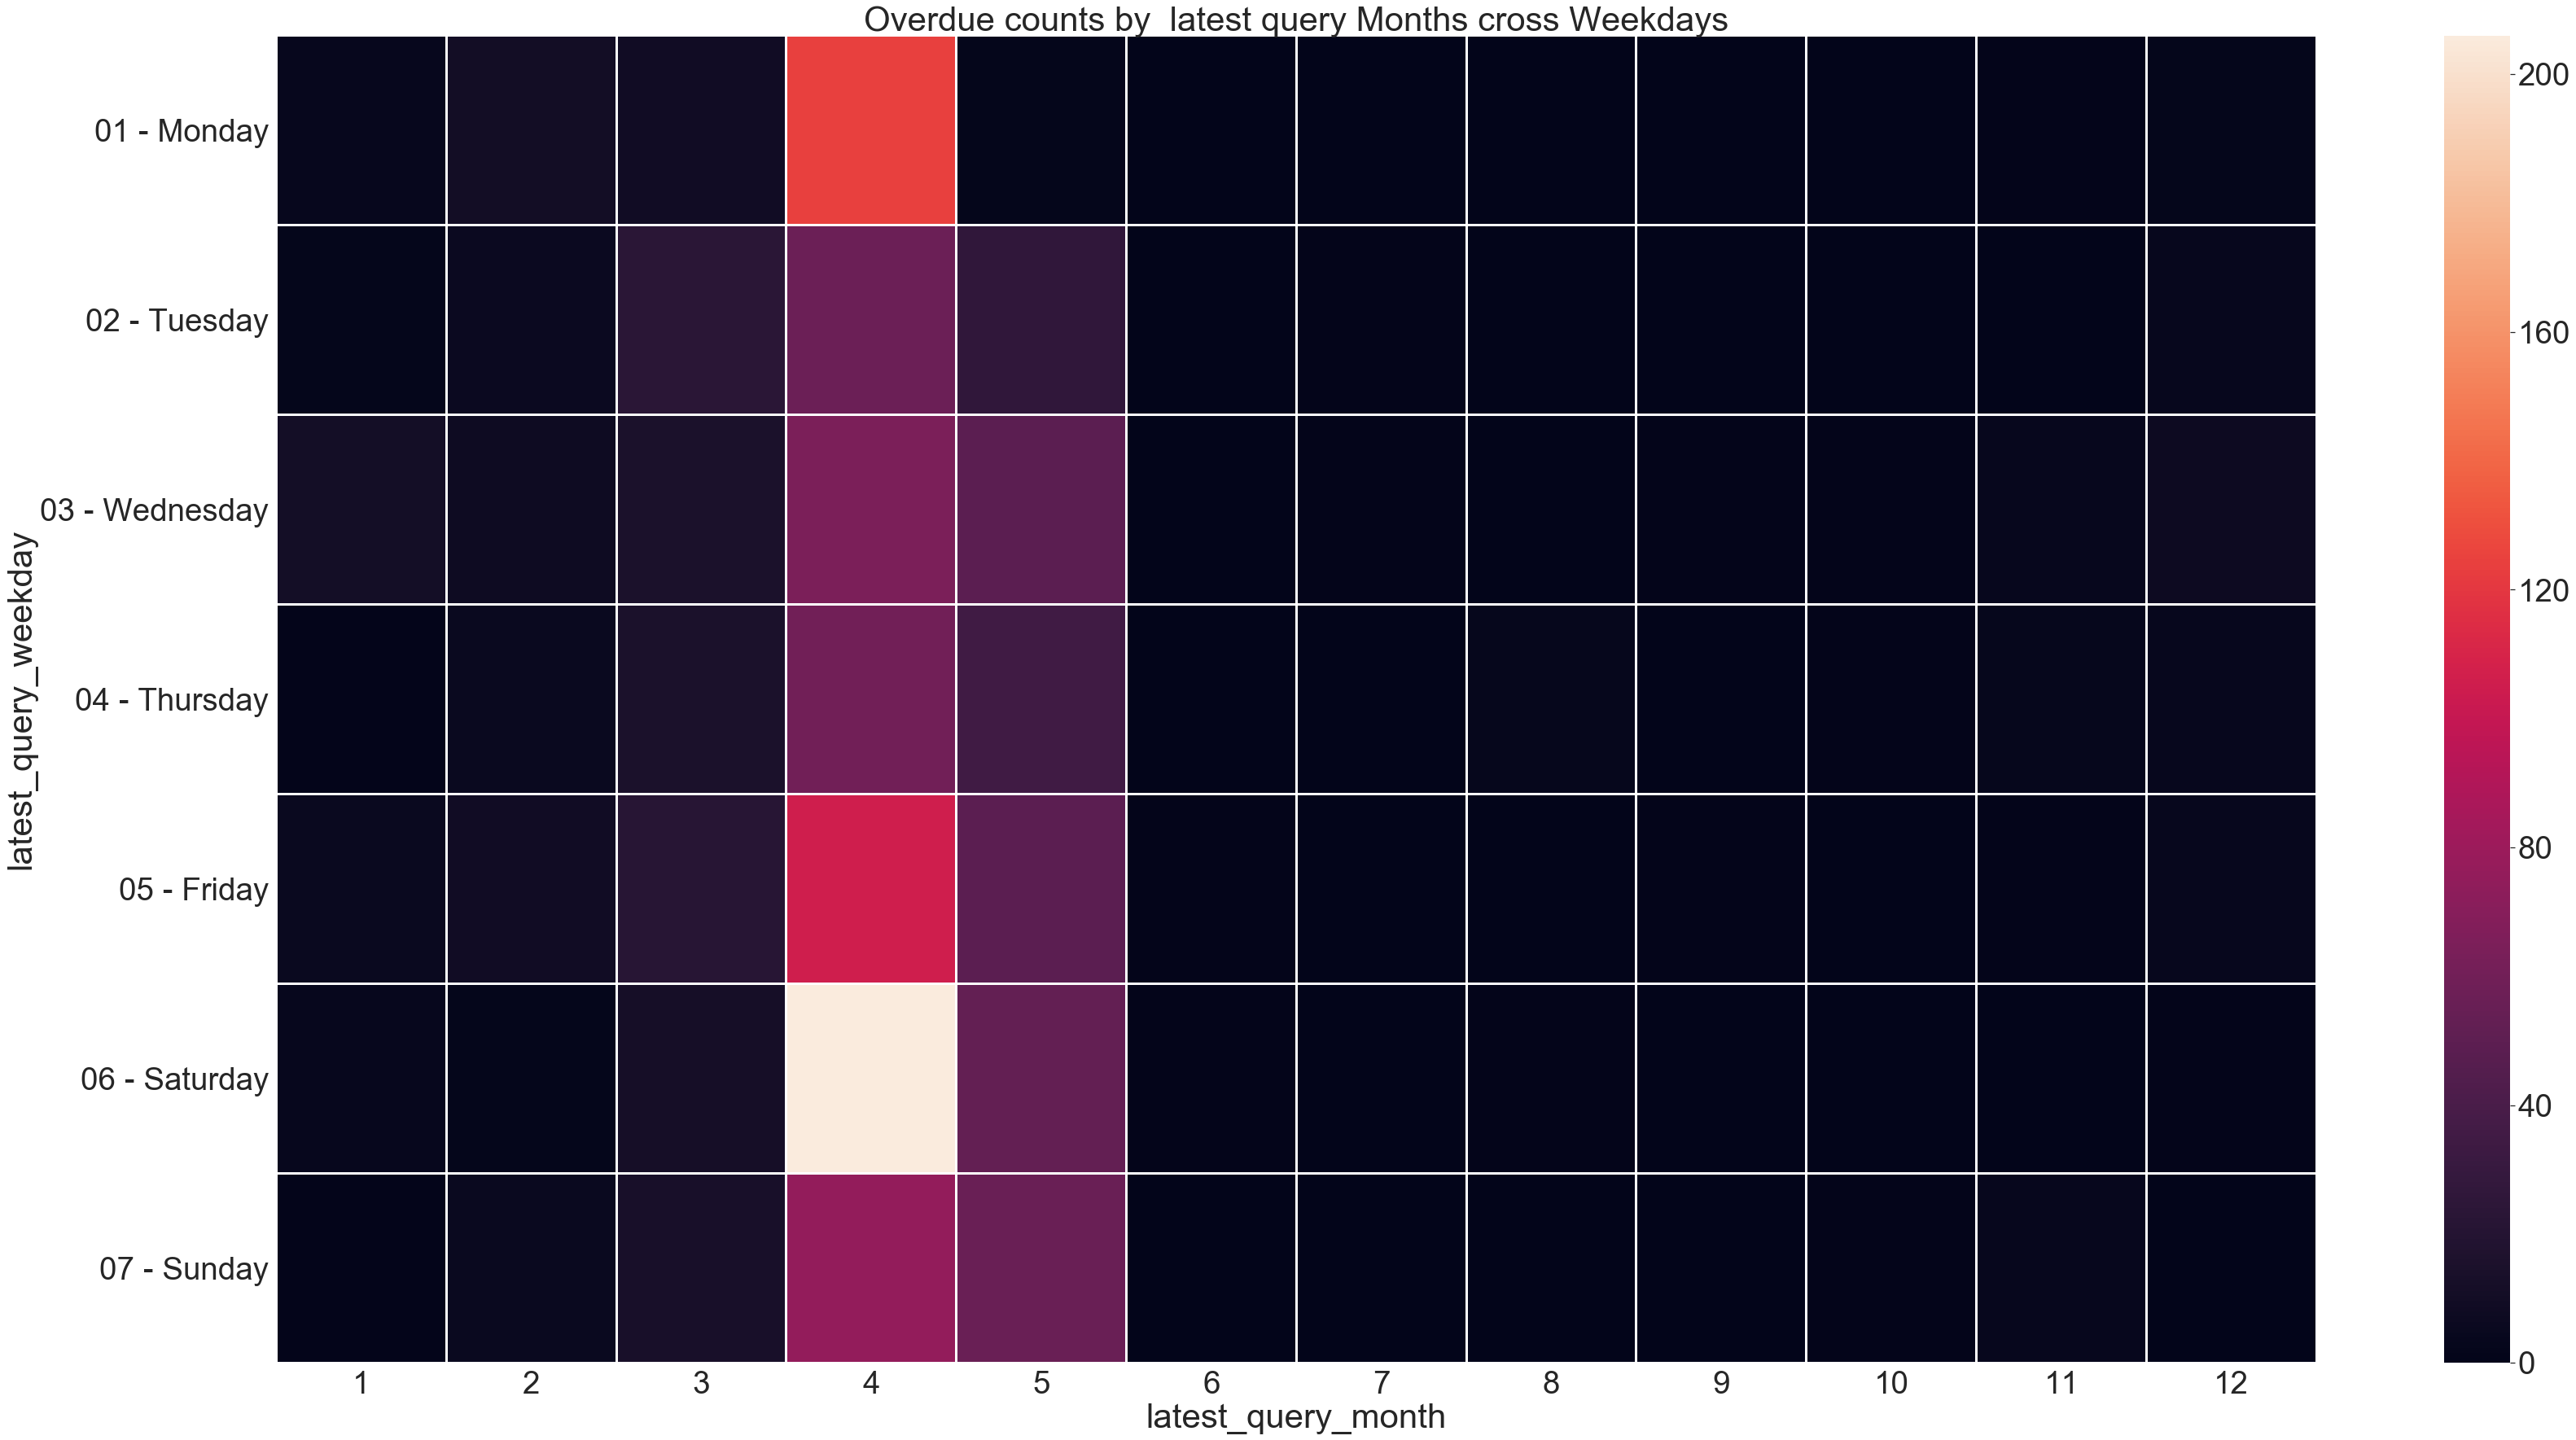

In [16]:
sns.set(font_scale=3.5) 

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(queryweekday_group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Overdue counts by  latest query Months cross Weekdays')
plt.show()

有如下结论：
- 最近一次查询或者最近一次贷款时间在18年4，5月份，逾期的可能性最高；
- 最近一次查询时间在4月份的周六、周一和周五，逾期概率最高
- to be continued ....